<a href="https://colab.research.google.com/github/Saketh991/Applied-Data-Science-Capstone1/blob/master/Assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 1) Write a function in python that inputs a dataframe and identify which columns have date in them. Using these date columns make new columns which are difference between these columns taking 2 at a time. (for instance if there is date1, date2, date3 columns, output should be like date1-date2, date2-date3, date1-date3).

In [3]:
import pandas as pd
import numpy as np

In [9]:
# Creating a data table using dictionary. This data consists of invalid format of dates and some Nan values also
data={"date1":["12/2019/11","27/12/2019","01/01/2019"],"date2":["11/2019/10",np.nan,"24/11/2019"],"date3":["13/2019/01","01/2019/11",np.nan]}
data1=pd.DataFrame.from_dict(data)
data1.head()

,date1,date2,date3
0,12/2019/11,11/2019/10,13/2019/01
1,27/12/2019,NaN,01/2019/11
2,01/01/2019,24/11/2019,NaN


This is a function which is used to fill Nan values with first date of respective column, sorts format of dates to DD/MM/YYYY, converts them into timedelta datatype and then calculates the difference between the dates


In [8]:
def get_difference(data):
    for i in data.columns:
        values={i:data[i][0]} #It fills the NaN values with first date of respective column 
        data=data.fillna(value=values)
    for col in data.columns:
        for row in range(data.shape[1]):
            if data[col][row][7]=='/':  #This loop sorts the date format to correct format
                  d=data[col][row][8:]
                  y=data[col][row][3:7]
                  m=data[col][row][0:2]
                  k=int(m)
                  if(k>12):
                    data[col][row]=m+'/'+ d +'/'+y
                  else:
                    data[col][row]=d+'/'+ m +'/'+y
    for j in data.columns:
        if data[j].dtypes=="object":
            data[j]=pd.to_datetime(data[j]) #The dataframe datatype is converted using to_datetime
    d=[]
    for i in range(data.shape[1]):
        if i==2:        
            k=data.iloc[:,i-2]-data.iloc[:,i]  #This loop gives the difference like date1-date2, date2-date3, date1-date3
        else:
            k=data.iloc[:,i]-data.iloc[:,i+1]
        d.append([k])
    return d

In [12]:
k=get_difference(data1)
k

[[0     32 days
  1     77 days
  2   -327 days
  dtype: timedelta64[ns]], [0   271 days
  1   -21 days
  2   315 days
  dtype: timedelta64[ns]], [0   303 days
  1    56 days
  2   -12 days
  dtype: timedelta64[ns]]]

Therefore we get the outputs in a list of list where the first list has an output of (date1-date2) and 2nd one has o/p of (date2-date3) and 3rd one as (date1-date3)

####2.Write a python function which take a dataframe as input and deals with the issue of outliers in all the continuous variables.

The example dataset which is used in this task is "House Sales in King County, USA" which can be obtained from kaggle.
The URL is: https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv

In [25]:
df1=pd.read_csv("kc_house_data.csv")

In [26]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


First lets just plot the outliers for any columns such as price and sqft_lot. We compare them again after removing outliers to see the difference 

{'boxes': [<matplotlib.lines.Line2D at 0x7fdaf0bbe550>],
 'caps': [<matplotlib.lines.Line2D at 0x7fdaf0bbef60>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdaf0bcaa20>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fdaf0bca6a0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdaf0bbe860>,
  <matplotlib.lines.Line2D at 0x7fdaf0bbebe0>]}

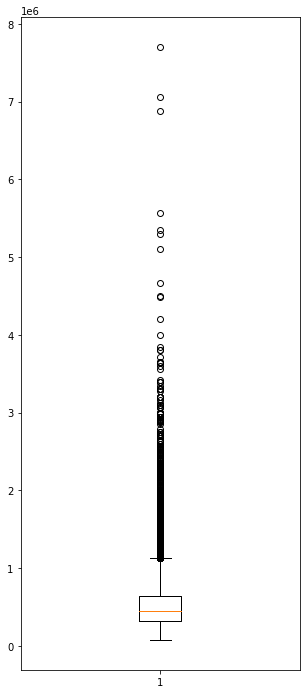

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=[5,12]) # It resizes the plot 
plt.boxplot(df1['price'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fdaf0b296a0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fdaf0b350f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdaf0b35b70>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fdaf0b357f0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdaf0b299b0>,
  <matplotlib.lines.Line2D at 0x7fdaf0b29d30>]}

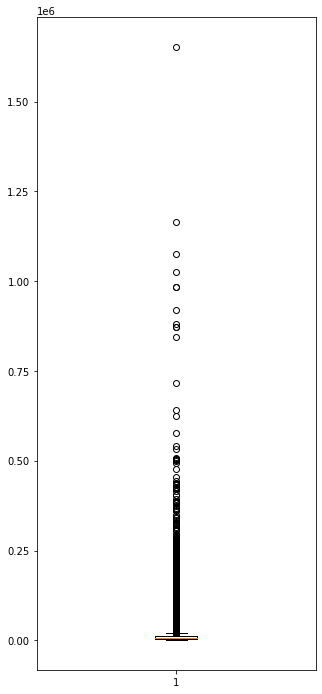

In [28]:
plt.figure(figsize=[5,12])
plt.boxplot(df1['sqft_lot'])

There are many ways to remove outliers. I used percentiles way to remove them

In [41]:
def remove_outliers(d):
  d=d.dropna()
  for col in d.columns:
      if (((d[col].dtype)=='float64') | ((d[col].dtype)=='int64')):
          p = d[col].quantile([0.999]).values # It gives the 99 percentile value of the column in an array form
  # It replaces the values which are greater than 99 percentile with the value of it thus removing the outliers which have odd maximum values
          d[col][d[col] >= p[0]] = p[0] 
      else:
          d[col]=d[col]
  return d

In [42]:
remove_outliers(df1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithC

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,20141013T000000,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,3,7,1180.0,0.0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6.414100e+09,20141209T000000,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,3,7,2170.0,400.0,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,20150225T000000,180000.0,2,1.00,770.0,10000.0,1.0,0,0,3,6,770.0,0.0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,20141209T000000,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,7,1050.0,910.0,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,20150218T000000,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,8,1680.0,0.0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2.630000e+08,20140521T000000,360000.0,3,2.50,1530.0,1131.0,3.0,0,0,3,8,1530.0,0.0,2009,0,98103,47.6993,-122.346,1530.0,1509.0
21609,6.600060e+09,20150223T000000,400000.0,4,2.50,2310.0,5813.0,2.0,0,0,3,8,2310.0,0.0,2014,0,98146,47.5107,-122.362,1830.0,7200.0
21610,1.523300e+09,20140623T000000,402101.0,2,0.75,1020.0,1350.0,2.0,0,0,3,7,1020.0,0.0,2009,0,98144,47.5944,-122.299,1020.0,2007.0
21611,2.913101e+08,20150116T000000,400000.0,3,2.50,1600.0,2388.0,2.0,0,0,3,8,1600.0,0.0,2004,0,98027,47.5345,-122.069,1410.0,1287.0


The below plots shows the difference before outliers and after outliers.

{'boxes': [<matplotlib.lines.Line2D at 0x7fdaf0c41748>],
 'caps': [<matplotlib.lines.Line2D at 0x7fdaf0ab3be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdaf0c46ba8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fdaf0c46588>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdaf0add128>,
  <matplotlib.lines.Line2D at 0x7fdaf0add2e8>]}

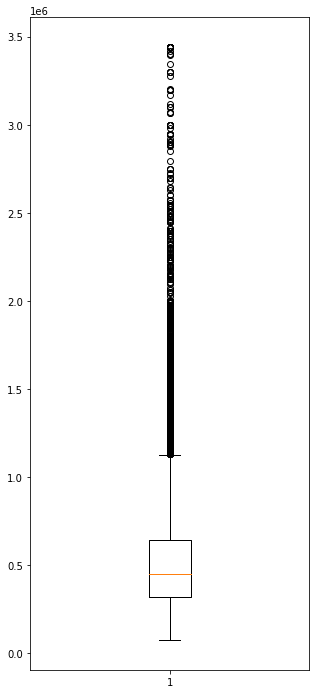

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=[5,12])
plt.boxplot(df1['price'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fdaf0a3ada0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fdaf09c47f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdaf09cc2b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fdaf09c4ef0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdaf09c40f0>,
  <matplotlib.lines.Line2D at 0x7fdaf09c4470>]}

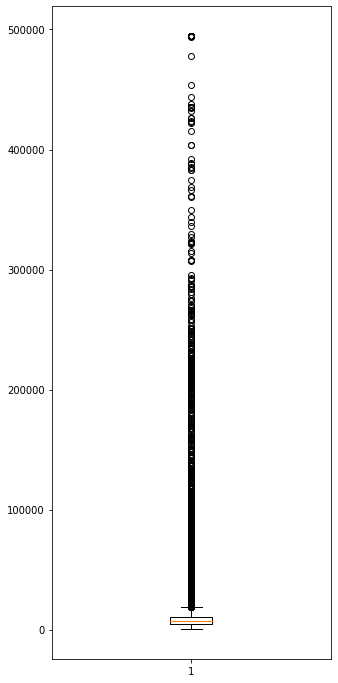

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=[5,12])
plt.boxplot(df1['sqft_lot'])

The above solution works fine for any kind of dataset.

####3) Write a function in python that take dataframe as input and drop columns having Pearson correlation more than 0.85

The same example dataset is used in this task "House Sales in King County, USA" which can be obtained from kaggle.
The URL is: https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv

In [47]:
hprice=pd.read_csv("kc_house_data.csv")

In [48]:
hprice.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [44]:
hprice.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


The below will be the function which is used to drop the corr which has above 0.85

In [45]:
def dropcorrcolumns(df):
    k=df.corr()
    p=k.values # It turns into the matrix 
    l=np.zeros((p.shape[0],p.shape[1])) # Create the matrix of dataframe shape consisting of only zeros
    for i in range(p.shape[0]):
        for j in range(p.shape[1]):
            if(i>j):
                l[i][j]=p[i][j] # This loop will give eliminate the duplicate values in the corr columns.
    m=l>0.85 # This is used to get the values in the form of boolean matrix. True if greater than 0.85 or else it is false
    list=[] # Create an empty list to append the columns which have corr>0.85
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            if(m[i][j]==True): # F
                list.append(i+1)
                list.append(j+1)
    list1=[] # This is used to get column numbers
    list2=[] # This is used to to get column names
    for num in list:  # The following loop removes duplicates in the list 
        if (num not in list1):
            list1.append(num)
            list2.append(df.columns[num])
    df=df.drop(columns=list2) # Finally the data which has corr > 0.85 is dropped
    print(list1)
    return df
    

**Note** : We can use this function to drop the columns for any values of positive correlation

In [46]:
dropcorrcolumns(hprice)

[12, 5]


,id,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1131,3.0,0,0,3,8,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,5813,2.0,0,0,3,8,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1350,2.0,0,0,3,7,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,2388,2.0,0,0,3,8,0,2004,0,98027,47.5345,-122.069,1410,1287


As we can see the columns 5 and 12 are eliminated in this new dataframe as those both columns have correlation greater than 0.85

###Thus three task functions are written and well executed. These 3 functions can be used for any kind of dataset. 
                 

####                            THANK YOU